<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; min-width: 250px; display: flex; justify-content: center;">
        <img src="https://adnova.novaims.unl.pt/media/22ui3ptm/logo.svg" style="max-width: 80%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;margin-left: 8rem;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style='color:#6f800f'> Data Mining Project | </span>
            <span style='color:#393B79'>ABCDEats Inc.</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>Filipa Pereira, 20240509</div>
            <div>Umeima Mahomed, 20240543</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            Group 37
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#6f800f, #393B79); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## **📚 Libraries Import**

In [18]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
from matplotlib.colors import LinearSegmentedColormap

# For density based clustering
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

# Set the style of the visualization
pd.set_option('display.max_columns', None)                  # display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display floats with 2 decimal places

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #6f800f,#393B79); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>Part 2 | Density Based Clustering </b></h1></center>
</div>

## **🧮 Import Data**

In [8]:
# Importing the dataset after the preprocessing
ABCDEats = pd.read_parquet('data/DM2425_ABCDEats_preprocessed.parquet')

In [9]:
# Display the first 5 rows just to confirm the import was successful
ABCDEats.head() 

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,last_promo_bin_True,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,payment_method_CASH,payment_method_DIGI,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,CUI_Italian_OTHER_PC,CUI_Chicken_Noodle_PC,CUI_Mixed_PC,CUI_American_Healthy_PC,CUI_Indian_PC,CUI_Japanese_PC,CUI_Beverages_PC,CUI_Desserts_PC,CUI_Thai_PC,CUI_Chinese_PC,CUI_Cafe_PC,CUI_Asian_StreetFood/Snacks_PC,HR_Lunch_Dinner_PC,HR_LateNight_PC,HR_Breakfast_PC,HR_AfternoonSnack_PC
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.00,2,5,1,0.00,1,DELIVERY,DIGI,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.88,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,2,1,1.00,0.50,True,28.88,Indian,1,14.44,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.06,-0.38,-1.66,0.73,3.14,0.95,-0.67,-1.01,-1.67,1.51,-0.36,-1.21,-0.28,-0.68,-0.71,-0.59
5d272b9dcb,8670,17.00,2,2,2,0.00,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,8,1,1.00,0.50,True,19.21,American,2,9.61,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.30,-0.38,-0.29,-0.38,-0.32,-0.36,0.14,-0.39,-0.41,-0.28,0.53,0.11,-0.58,-0.42,0.12,-0.50
f6d1b2ba63,4660,38.00,1,2,2,0.00,1,DISCOUNT,CASH,9.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,4,2,1.00,0.50,True,9.20,American,1,4.60,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.17,-0.22,-0.58,-0.18,-0.30,-0.30,0.11,-0.10,-0.26,-0.30,0.37,-0.06,-0.61,-0.37,0.27,-0.39
180c632ed8,4660,24.00,2,3,1,0.00,2,DELIVERY,DIGI,0.00,13.70,0.00,0.00,0.00,0.00,0.00,0.00,17.86,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,4,1,2.00,1.00,True,31.56,Indian,2,15.78,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.21,-0.33,-1.02,0.53,1.87,0.77,-0.46,-0.89,-1.05,1.15,-0.11,-0.19,-0.29,-0.47,-0.23,-0.15
4eb37a6705,4660,20.00,2,5,0,0.00,2,NO PROMO,DIGI,14.57,40.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,

In [10]:
# Number of rows and columns
print('Number of\033[1m rows \033[0m:', ABCDEats.shape[0])
print('Number of\033[1m columns \033[0m:', ABCDEats.shape[1])

Number of rows : 30169
Number of columns : 112


In [11]:
# Check the data types
ABCDEats.dtypes

customer_region                    object
customer_age                      float64
vendor_count                        int64
product_count                       int64
chain_count                         int64
                                   ...   
CUI_Asian_StreetFood/Snacks_PC    float64
HR_Lunch_Dinner_PC                float64
HR_LateNight_PC                   float64
HR_Breakfast_PC                   float64
HR_AfternoonSnack_PC              float64
Length: 112, dtype: object

---

In [12]:
# Create a continuous and discrete colormap
colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F"]
NOVAIMS_palette_colors = sns.color_palette(colors[::-1], as_cmap=True)

colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F", "#FFFFFF"]
NOVAIMS_palette_colors_continuous = LinearSegmentedColormap.from_list("NOVAIMS_palette", colors[::-1])

In [13]:
list(ABCDEats.columns)

['customer_region',
 'customer_age',
 'vendor_count',
 'product_count',
 'chain_count',
 'first_order',
 'last_order',
 'last_promo',
 'payment_method',
 'CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai',
 'DOW_0',
 'DOW_1',
 'DOW_2',
 'DOW_3',
 'DOW_4',
 'DOW_5',
 'DOW_6',
 'HR_0',
 'HR_1',
 'HR_2',
 'HR_3',
 'HR_4',
 'HR_5',
 'HR_6',
 'HR_7',
 'HR_8',
 'HR_9',
 'HR_10',
 'HR_11',
 'HR_12',
 'HR_13',
 'HR_14',
 'HR_15',
 'HR_16',
 'HR_17',
 'HR_18',
 'HR_19',
 'HR_20',
 'HR_21',
 'HR_22',
 'HR_23',
 'order_count',
 'customer_region_buckets',
 'customer_age_group',
 'days_between_orders',
 'days_between_orders_per_order',
 'last_promo_bin',
 'CUI_Total_Amount_Spent',
 'CUI_Most_Spent_Cuisine',
 'CUI_Total_Food_Types',
 'CUI_Avg_Amount_Spent',
 'last_promo_bin_True',
 'last_promo_DI

<div class="alert alert-block alert-danger" style="font-size:20px;">

> **🛑 Warning:** Ainda nos falta tirar as variáveis ***multicolineares*** e ***irrelevantes*** do nosso dataset.

In [14]:
# Define metric and non-metric features
metric_features = [
    'customer_age', 'vendor_count', 'product_count', 'chain_count', 'first_order', 'last_order',
    'order_count', 
    'days_between_orders', 
    'days_between_orders_per_order',
    'last_promo_bin',
    'CUI_Total_Amount_Spent',
    'CUI_Total_Food_Types',
    'CUI_Avg_Amount_Spent',
    
    # Principal Components [CUI] 
    'CUI_Italian_OTHER_PC',
    'CUI_Chicken_Noodle_PC',
    'CUI_Mixed_PC',
    'CUI_American_Healthy_PC',
    'CUI_Indian_PC',
    'CUI_Japanese_PC',
    'CUI_Beverages_PC',
    'CUI_Desserts_PC',
    'CUI_Thai_PC',
    'CUI_Chinese_PC',
    'CUI_Cafe_PC',
    'CUI_Asian_StreetFood/Snacks_PC',
    
    # Original [DOW]
    'DOW_0',
    'DOW_1',
    'DOW_2',
    'DOW_3',
    'DOW_4',
    'DOW_5',
    'DOW_6',
    
    # Principal Components [HR]
    'HR_Lunch_Dinner_PC',
    'HR_LateNight_PC',
    'HR_Breakfast_PC',
    'HR_AfternoonSnack_PC'
]

# Non-metric columns
non_metric_features = [
    'customer_age_group', 'customer_region_buckets', 'customer_region', 
    'last_promo', 'payment_method', 'CUI_Most_Spent_Cuisine',
]

print(f'Metric columns: {len(metric_features)}, {metric_features} \n')
print(f'Non-Metric columns: {len(non_metric_features)}, {non_metric_features}')

Metric columns: 36, ['customer_age', 'vendor_count', 'product_count', 'chain_count', 'first_order', 'last_order', 'order_count', 'days_between_orders', 'days_between_orders_per_order', 'last_promo_bin', 'CUI_Total_Amount_Spent', 'CUI_Total_Food_Types', 'CUI_Avg_Amount_Spent', 'CUI_Italian_OTHER_PC', 'CUI_Chicken_Noodle_PC', 'CUI_Mixed_PC', 'CUI_American_Healthy_PC', 'CUI_Indian_PC', 'CUI_Japanese_PC', 'CUI_Beverages_PC', 'CUI_Desserts_PC', 'CUI_Thai_PC', 'CUI_Chinese_PC', 'CUI_Cafe_PC', 'CUI_Asian_StreetFood/Snacks_PC', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_Lunch_Dinner_PC', 'HR_LateNight_PC', 'HR_Breakfast_PC', 'HR_AfternoonSnack_PC'] 

Non-Metric columns: 6, ['customer_age_group', 'customer_region_buckets', 'customer_region', 'last_promo', 'payment_method', 'CUI_Most_Spent_Cuisine']


In [15]:
# List of weekdays (0 = Sunday, 6 = Saturday)
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekdays_dict = dict(enumerate(weekdays))
weekdays_dict

{0: 'Sunday',
 1: 'Monday',
 2: 'Tuesday',
 3: 'Wednesday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday'}

---

## **⚫🟢⚪ Clustering**

In [16]:
def get_ss(ABCDEats):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(ABCDEats.var() * (ABCDEats.count() - 1))
    return ss  # return sum of sum of squares of each ABCDEats variable

#### **Mean Shift Clustering** [**<sup>[6]</sup>**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift)


In [28]:
# The following bandwidth can be automatically detected using 
# # (we need to set quantile though)
# Based on distance to nearest neighbors for all observations

bandwidth = estimate_bandwidth(ABCDEats[metric_features], 
                               # quantile=0.9,    # q = 0.9 -> 90% of the data is used to estimate the bandwidth (neighbors)  5.85
                               quantile=0.1,     # q = 0.06 -> 6% of the data is used to estimate the bandwidth (neighbors) -> Ela viu este valor em referências
                               random_state=1, 
                               n_jobs=-1)
bandwidth

32.491315524647625

In [29]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
# TO-DO: explore the MeanShift class and obtain the cluster labels
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift
ms = MeanShift(bandwidth=bandwidth,     # Bandwidth to use
               bin_seeding=True,        # Use bin seeding to speed-up the algorithm
               n_jobs=-1)               # Use all available cores
ms_labels = ms.fit_predict(ABCDEats[metric_features])

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 3


In [30]:
# Concatenating the labels to ABCDEats
ABCDEats_concat = pd.concat([ABCDEats[metric_features], pd.Series(ms_labels, index=ABCDEats.index, name="ms_labels")], axis=1)
ABCDEats_concat.head()

,customer_age,vendor_count,product_count,chain_count,first_order,last_order,order_count,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,CUI_Italian_OTHER_PC,CUI_Chicken_Noodle_PC,CUI_Mixed_PC,CUI_American_Healthy_PC,CUI_Indian_PC,CUI_Japanese_PC,CUI_Beverages_PC,CUI_Desserts_PC,CUI_Thai_PC,CUI_Chinese_PC,CUI_Cafe_PC,CUI_Asian_StreetFood/Snacks_PC,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_Lunch_Dinner_PC,HR_LateNight_PC,HR_Breakfast_PC,HR_AfternoonSnack_PC,ms_labels
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,18.00,2,5,1,0.00,1,2,1.00,0.50,True,28.88,1,14.44,1.06,-0.38,-1.66,0.73,3.14,0.95,-0.67,-1.01,-1.67,1.51,-0.36,-1.21,1,0,0,0,0,0,1,-0.28,-0.68,-0.71,-0.59,2
5d272b9dcb,17.00,2,2,2,0.00,1,2,1.00,0.50,True,19.21,2,9.61,-0.30,-0.38,-0.29,-0.38,-0.32,-0.36,0.14,-0.39,-0.41,-0.28,0.53,0.11,1,0,0,0,0,0,1,-0.58,-0.42,0.12,-0.50,2
f6d1b2ba63,38.00,1,2,2,0.00,1,2,1.00,0.50,True,9.20,1,4.60,-0.17,-0.22,-0.58,-0.18,-0.30,-0.30,0.11,-0.10,-0.26,-0.30,0.37,-0.06,1,0,0,0,0,0,1,-0.61,-0.37,0.27,-0.39,2
180c632ed8,24.00,2,3,1,0.00,2,2,2.00,1.00,True,31.56,2,15.78,0.21,-0.33,-1.02,0.53,1.87,0.77,-0.46,-0.89,-1.05,1.15,-0.11,-0.19,0,1,0,0,0,0,1,-0.29,-0.47,-0.23,-0.15,2
4eb37a6705,20.00,2,5,0,0.00,2,2,2.00,1.00,False,55.44,2,27.72,-1.15,-0.70,0.63,-0.55,-0.28,-0.02,0.07,-1.31,-0.57,0.30,0.82,1.37,0,1,0,0,0,0,1,-0.76,-0.11,0.86,-0.09,2


In [31]:
# Computing the R^2 of the cluster solution
sst = get_ss(ABCDEats[metric_features])                                              # Get total sum of squares
ssw_labels = ABCDEats_concat.groupby(by='ms_labels')[metric_features].apply(get_ss)  # Compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)                                                       # Remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.5488


---

#### **Density Based Clustering [DBSCAN] [**<sup>[7]</sup>**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)**

<div class="alert alert-block alert-danger" style="font-size:20px;">

**🛑 Warning:** NÃO FAÇO IDEIA DE COMO TUNAR ESTES VALORES :(


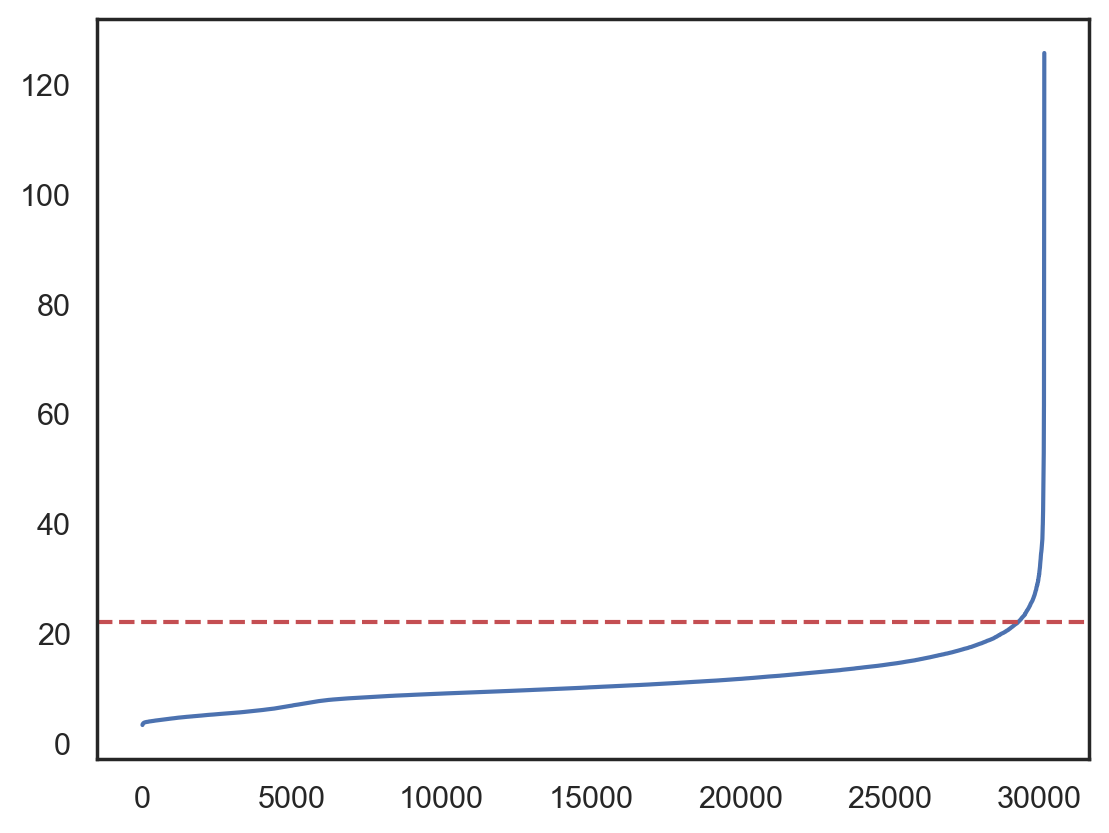

In [82]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=30)
neigh.fit(ABCDEats[metric_features])
distances, _ = neigh.kneighbors(ABCDEats[metric_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)

# Put a horizontal line at y = 1.9
plt.axhline(y=22, color='r', linestyle='--')

plt.show()

In [94]:
# Perform DBSCAN clustering                                     
dbscan = DBSCAN(eps=22, 
                min_samples=3, 
                n_jobs=-1)
dbscan_labels = dbscan.fit_predict(ABCDEats[metric_features]) 

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 5


In [95]:
np.unique(dbscan_labels)

array([-1,  0,  1,  2,  3], dtype=int64)

In [96]:
#epson=0.5
from collections import Counter
Counter(dbscan_labels)

Counter({0: 30052, -1: 106, 1: 4, 3: 4, 2: 3})

In [97]:
# Concatenating the labels to ABCDEats
ABCDEats_concat = pd.concat([ABCDEats[metric_features], pd.Series(dbscan_labels, index=ABCDEats.index, name="dbscan_labels")], axis=1)
ABCDEats_concat.head()

,customer_age,vendor_count,product_count,chain_count,first_order,last_order,order_count,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,CUI_Italian_OTHER_PC,CUI_Chicken_Noodle_PC,CUI_Mixed_PC,CUI_American_Healthy_PC,CUI_Indian_PC,CUI_Japanese_PC,CUI_Beverages_PC,CUI_Desserts_PC,CUI_Thai_PC,CUI_Chinese_PC,CUI_Cafe_PC,CUI_Asian_StreetFood/Snacks_PC,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_Lunch_Dinner_PC,HR_LateNight_PC,HR_Breakfast_PC,HR_AfternoonSnack_PC,dbscan_labels
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,18.00,2,5,1,0.00,1,2,1.00,0.50,True,28.88,1,14.44,1.06,-0.38,-1.66,0.73,3.14,0.95,-0.67,-1.01,-1.67,1.51,-0.36,-1.21,1,0,0,0,0,0,1,-0.28,-0.68,-0.71,-0.59,0
5d272b9dcb,17.00,2,2,2,0.00,1,2,1.00,0.50,True,19.21,2,9.61,-0.30,-0.38,-0.29,-0.38,-0.32,-0.36,0.14,-0.39,-0.41,-0.28,0.53,0.11,1,0,0,0,0,0,1,-0.58,-0.42,0.12,-0.50,0
f6d1b2ba63,38.00,1,2,2,0.00,1,2,1.00,0.50,True,9.20,1,4.60,-0.17,-0.22,-0.58,-0.18,-0.30,-0.30,0.11,-0.10,-0.26,-0.30,0.37,-0.06,1,0,0,0,0,0,1,-0.61,-0.37,0.27,-0.39,0
180c632ed8,24.00,2,3,1,0.00,2,2,2.00,1.00,True,31.56,2,15.78,0.21,-0.33,-1.02,0.53,1.87,0.77,-0.46,-0.89,-1.05,1.15,-0.11,-0.19,0,1,0,0,0,0,1,-0.29,-0.47,-0.23,-0.15,0
4eb37a6705,20.00,2,5,0,0.00,2,2,2.00,1.00,False,55.44,2,27.72,-1.15,-0.70,0.63,-0.55,-0.28,-0.02,0.07,-1.31,-0.57,0.30,0.82,1.37,0,1,0,0,0,0,1,-0.76,-0.11,0.86,-0.09,0


In [98]:
# Detecting noise (potential outliers)
# TO-DO: can we identify the noisy data? 
ABCDEats_concat.loc[ABCDEats_concat['dbscan_labels'] == -1]

,customer_age,vendor_count,product_count,chain_count,first_order,last_order,order_count,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,CUI_Italian_OTHER_PC,CUI_Chicken_Noodle_PC,CUI_Mixed_PC,CUI_American_Healthy_PC,CUI_Indian_PC,CUI_Japanese_PC,CUI_Beverages_PC,CUI_Desserts_PC,CUI_Thai_PC,CUI_Chinese_PC,CUI_Cafe_PC,CUI_Asian_StreetFood/Snacks_PC,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_Lunch_Dinner_PC,HR_LateNight_PC,HR_Breakfast_PC,HR_AfternoonSnack_PC,dbscan_labels
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
543b4d9746,26.00,5,17,12,0.00,24,12,24.00,2.00,True,90.12,4,7.51,-2.11,2.34,1.53,1.84,2.69,-3.05,8.20,0.26,0.48,1.04,-3.29,-2.72,3,1,1,3,2,0,2,2.11,0.95,4.28,1.35,-1
d5cbe9cd02,31.00,7,26,12,0.00,25,16,25.00,1.56,True,96.93,5,6.06,0.82,5.43,4.14,0.09,-1.55,-0.51,2.11,-1.17,0.92,6.76,1.84,-3.76,5,0,3,2,0,3,3,5.36,0.31,0.76,-0.88,-1
4dfcdff3c0,28.00,7,18,7,0.00,46,15,46.00,3.07,False,119.03,4,7.94,1.56,0.41,2.12,-3.75,-2.26,-1.86,-0.80,-0.98,0.60,3.74,1.69,-3.74,2,2,0,3,1,1,6,5.55,0.57,-1.01,-3.46,-1
eb4664b1ac,39.00,5,31,25,0.00,69,25,69.00,2.76,False,87.93,5,3.52,0.49,2.96,2.13,0.75,2.66,-1.11,6.48,0.50,4.28,-0.02,-0.98,-0.70,0,1,1,3,3,10,7,5.05,12.49,-1.41,6.69,-1
029fbb1d44,27.00,14,54,40,0.00,84,47,84.00,1.79,False,157.44,7,3.35,1.96,8.52,5.79,2.20,0.12,-1.89,4.06,-1.90,-0.50,1.40,2.10,-4.30,3,4,6,8,2,13,11,14.53,3.74,11.49,-1.42,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62bf635e33,57.00,6,10,5,52.00,81,6,29.00,4.83,False,116.40,5,19.40,-2.32,-0.55,2.82,-1.11,0.36,0.48,1.58,-1.18,-0.04,-0.50,-1.44,-0.96,1,2,1,1,1,0,0,-0.05,-0.31,1.73,0.61,-1
d3888cd29c,22.00,2,12,5,56.00,89,5,33.00,6.60,True,90.56,2,18.11,5.35,10.94,-0.50,-2.21,4.01,-1.95,-2.65,-3.34,-4.60,-12.98,-0.75,3.62,0,0,2,0,2,0,1,1.53,1.82,-3.02,-1.01,-1
4ffbac5898,40.00,6,12,2,65.00,87,7,22.00,3.14,False,133.98,2,19.14,-4.41,-1.00,2.26,-0.46,0.41,0.36,-3.35,-3.14,2.74,-0.07,-1.97,-0.74,0,2,2,2,0,1,0,-1.82,3.97,5.37,0.08,-1


In [99]:
# Computing the R^2 of the cluster solution
ABCDEats_nonoise = ABCDEats_concat.loc[ABCDEats_concat['dbscan_labels'] != -1]
sst = get_ss(ABCDEats[metric_features])  # get total sum of squares
ssw_labels = ABCDEats_nonoise.groupby(by='dbscan_labels')[metric_features].apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0296


#### **GMM (Gaussian Mixture Model)** [**<sup>[8]</sup>**](https://scikit-learn.org/1.5/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture)

In [100]:
# Performing GMM clustering
# https://scikit-learn.org/1.5/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
gmm = GaussianMixture(n_components=4, 
                      covariance_type='full', 
                      n_init=10, 
                      init_params='kmeans', 
                      random_state=1)
gmm_labels = gmm.fit_predict(ABCDEats[metric_features])
labels_proba = gmm.predict_proba(ABCDEats[metric_features])

In [101]:
# The estimated component weights
gmm.weights_

array([0.26521838, 0.31124505, 0.27426644, 0.14927014])

In [102]:
# The estimated mean vectors of the Components
print(gmm.means_.shape)
gmm.means_

(4, 36)


array([[ 2.74965783e+01,  1.33337397e+00,  1.82328069e+00,
         8.24819372e-01,  4.04488592e+01,  5.15046795e+01,
         1.44122127e+00,  1.10558203e+01,  5.52791015e+00,
         5.77965306e-01,  1.56853586e+01,  1.20756890e+00,
         1.15157607e+01, -1.09502574e-01, -6.88353148e-02,
        -6.00673002e-01,  5.43735114e-02, -1.54605231e-01,
        -4.36333614e-02, -6.69876134e-02, -7.72870144e-02,
        -1.21631179e-01,  1.12574025e-01,  1.40488964e-01,
         2.18684152e-01,  1.54186151e-01,  1.61906482e-01,
         1.65014317e-01,  1.86713086e-01,  2.48887095e-01,
         2.60072395e-01,  2.64441743e-01, -7.25932416e-01,
        -3.58945922e-01, -4.32065039e-01, -6.69622848e-02],
       [ 2.73883856e+01,  2.50801841e+00,  3.94782051e+00,
         1.84923059e+00,  3.09442665e+01,  6.25336804e+01,
         3.08740986e+00,  3.15894139e+01,  9.24444157e+00,
         5.00304351e-01,  3.70389090e+01,  1.86248928e+00,
         1.30171150e+01, -9.71168229e-01, -1.95185604e-

In [103]:
# The estimated covariance matrices of the Components
gmm.covariances_.shape

(4, 36, 36)

In [ ]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(ABCDEats[metric_features])
          for n in n_components]

bic_values = [m.bic(ABCDEats[metric_features]) for m in models]
aic_values = [m.aic(ABCDEats[metric_features]) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [ ]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=3, 
                      covariance_type='full', 
                      n_init=10, 
                      init_params='kmeans', 
                      random_state=1)
gmm_labels = gmm.fit_predict(ABCDEats[metric_features])

In [ ]:
# Concatenating the labels to ABCDEats
ABCDEats_concat = pd.concat([ABCDEats[metric_features], pd.Series(gmm_labels, index=ABCDEats.index, name="gmm_labels")], axis=1)
ABCDEats_concat.head()

In [ ]:
# Computing the R^2 of the cluster solution
sst = get_ss(ABCDEats[metric_features])  # get total sum of squares
ssw_labels = ABCDEats_concat.groupby(by='gmm_labels')[metric_features].apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

---

## **📏 Clustering Evaluation/Analysis**

---